# Interpreting Probability.


---
### **Case 1 : Predictive Manintenance**
• Scenario: A factory uses sensor data to predict machine failures:
– Model A: Claims ”85% accuracy” based on past data.
– Model B: A technicial says ”I’m 70% sure it will fail by Friday” based on noise/vibration.

**Tasks:**


1.   Label the probability type for each model.

*   Model A (85% accuracy) → Empirical probability (based on past data).
*    Model B (70% certainty by technician) → Subjective probability (based on expert belief).

2.   Which would you trust more? Justify using data quality.

  Model A is more objective and reliable as it’s validated on large datasets and shows consistent performance.

  However, Model B can catch nuanced anomalies if the technician has deep experience.

3. How would you combine both?



*   Bayesian Updating: Use technician belief as a prior and update with sensor data (likelihood).


*   Ensemble Model: Feed technician input as a feature in a machine learning model alongside sensor data.


---


### Case 2: Election Forecasting

*    Scenario: A political analyst says: “Our model gives a 68% chance that Candidate A will win the
upcoming election.”

**Tasks:**

1.   What type of probability is this?

*   Subjective — driven by assumptions and model design (not repeatable physical events).

2.   What data and assumptions drive the model?

*   Historical voting trends, polling data, demographic analysis, turnout estimates.

3. How could different models yield different probabilities?

*   Each model may use different data, weight variables differently, or apply unique methodologies.


---

### Case 3: AI System Failure

*   Scenario: An AI safety researcher claims: “There is a 10% chance that a powerful AI system will
behave unsafely by 2030.”

**Tasks:**
1. Is this a classical, empirical, or subjective probability?

  Subjective — no historical frequency, based on expert judgment or simulations.

2. What evidence or reasoning might support such a claim?

  Risk analysis, hypothetical scenarios, expert consensus, prior case studies.

3. What makes this probability controversial or uncertain?

  Limited real data, future uncertainty, and differing assumptions cause disagreement.


---

### Case 4: Insurance Pricing

*   Scenario: An actuary sets car insurance rates based on:

  – Initial Policy Based on Historical Crash Data - E.g. 5% of 20 year old drivers file claims.

  – New policy - Drivers who pass a safe-driving course get a 10% discount.

**Tasks:**
1. Are the initial rates classical, empirical, or subjective?

  Empirical probability — based on actual claim history.

2. Is the discount’s probability adjustment empirical or subjective? Why?

  Subjective or Empirical — depends on whether it's based on judgment or analyzed safe-driving data.

---

### Case 5: Dynamic Pricing


*   Scenario: A ride-sharing app charges ”2x surge pricing” during rain. The algorithm claims:

  "There’s a 60% probability of rain at 5 PM,” using weather APIs and historical demand.



**Tasks:**
1. Deconstruct the 60%: Is it empirical (weather data), subjective (demand heuristics), or both?

  Empirical from weather API + Subjective if demand heuristics are added.

2. How might riders perceive this probability differently than the company?



*   Riders may see it as manipulation or unfair pricing.
*   Company sees it as demand management.



3. How would you test if the surge price is truly demand-driven vs. exploitative?

*   Analyze correlation between weather forecasts and actual demand changes.
*   A/B test surge pricing vs. flat rate during rain.












In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


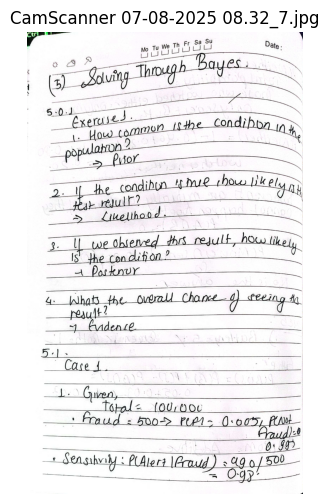

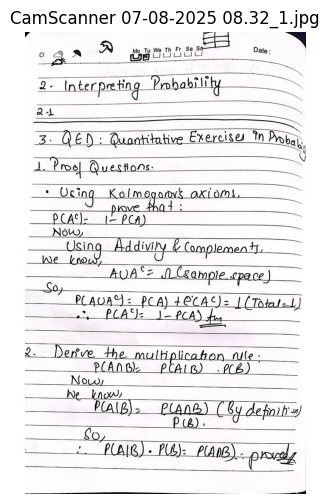

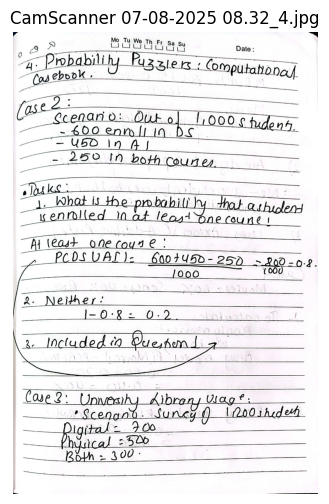

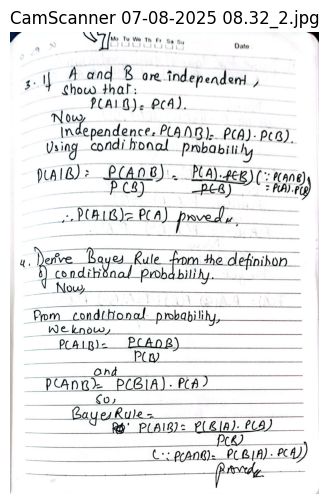

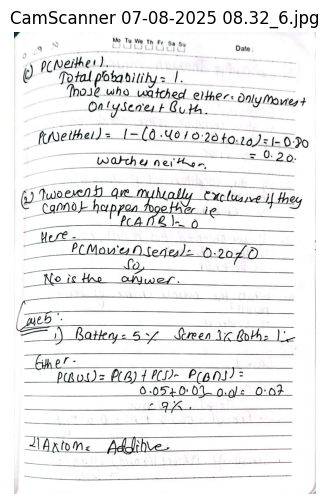

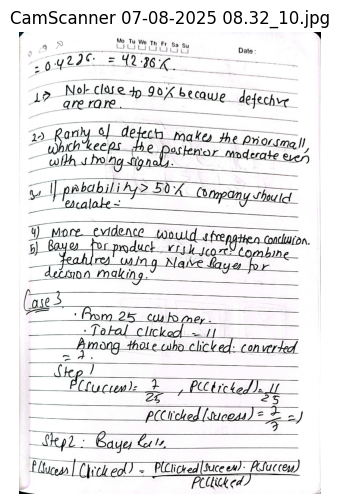

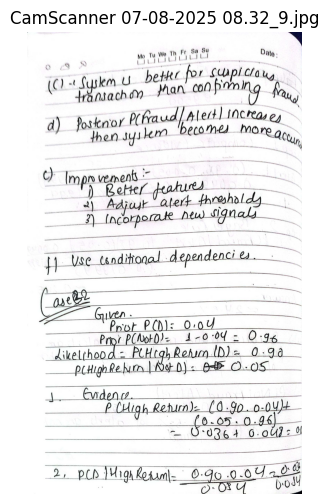

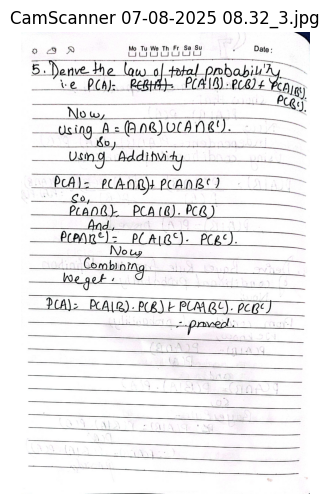

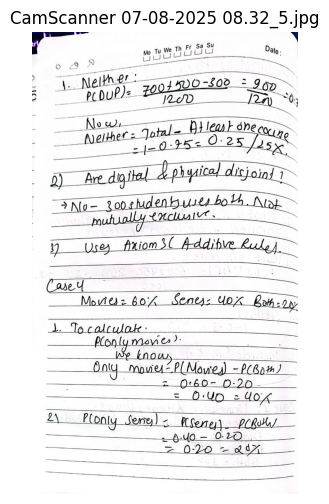

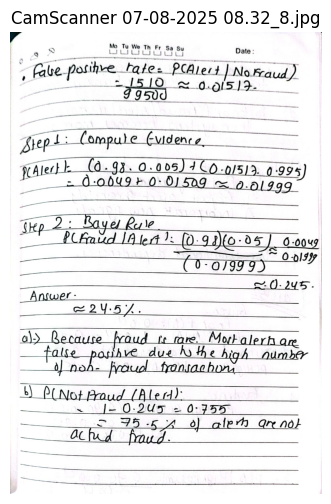

In [16]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set your folder path
folder_path = '/content/drive/MyDrive/CamScanner 07-08-2025 08.32'

# Get list of all image files (supports jpg, jpeg, png)
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

#  Display each image
for img_file in image_files:
    img_path = os.path.join(folder_path, img_file)
    img = mpimg.imread(img_path)

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_file)
    plt.show()


In [7]:
import pandas as pd

# Set file path
file_path = '/content/drive/MyDrive/dataset/product_review_dataset.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip().str.lower()


In [8]:
print(df.columns.tolist())



['defective', 'highreturn', 'reviewrating', 'hascomplaint', 'verifiedpurchase']


In [9]:
#Prior Probability
p_defective = df['defective'].mean()
print("P(defective):", round(p_defective, 4))


P(defective): 0.0961


In [10]:
avg_def = df[df['defective'] == True]['reviewrating'].mean()
avg_nondef = df[df['defective'] == False]['reviewrating'].mean()

print(f"Average Rating (Defective): {avg_def:.2f}")
print(f"Average Rating (Non-Defective): {avg_nondef:.2f}")


Average Rating (Defective): 2.48
Average Rating (Non-Defective): 4.18


In [11]:


# P(highreturn | defective)
p_highreturn_given_def = df[df['defective'] == True]['highreturn'].mean()

# P(highreturn | non-defective)
p_highreturn_given_nondef = df[df['defective'] == False]['highreturn'].mean()

# P(highreturn)
p_highreturn = df['highreturn'].mean()

# P(defective)
p_defective = df['defective'].mean()

# Bayes: P(defective | highreturn)
p_def_given_highreturn = (p_highreturn_given_def * p_defective) / p_highreturn

print(f"P(HighReturn | Defective): {p_highreturn_given_def:.2%}")
print(f"P(HighReturn | Not Defective): {p_highreturn_given_nondef:.2%}")
print(f"P(Defective | HighReturn): {p_def_given_highreturn:.2%}")


P(HighReturn | Defective): 69.61%
P(HighReturn | Not Defective): 10.26%
P(Defective | HighReturn): 41.92%


In [12]:
p_high_given_def = df[df['defective'] == 1]['highreturn'].mean()
p_high_given_notdef = df[df['defective'] == 0]['highreturn'].mean()
p_high_return = df['highreturn'].mean()
p_def = df['defective'].mean()

# P(Defective | HighReturn)
p_def_given_high = (p_high_given_def * p_def) / p_high_return

print("2.1 P(HighReturn | Defective):", round(p_high_given_def, 4))
print("    P(HighReturn | Not Defective):", round(p_high_given_notdef, 4))
print("    P(Defective | HighReturn):", round(p_def_given_high, 4))


2.1 P(HighReturn | Defective): 0.6961
    P(HighReturn | Not Defective): 0.1026
    P(Defective | HighReturn): 0.4192


If P(Defective | HighReturn) ≈ 0.4192:
 Only ~41% of high-return items are defective.
So, most high returns are due to non-defect reasons like preference or wrong sizing.
Action: Do NOT recall based on high return alone. Use multiple factors.


In [13]:
def calculate_risk(row):
    score = 0
    if row['highreturn'] == 1:
        score += 1
    if row['reviewrating'] <= 2:
        score += 1
    if row['hascomplaint']:
        score += 1
    return score

df['riskscore'] = df.apply(calculate_risk, axis=1)


In [14]:
top_10_risk = df.sort_values(by='riskscore', ascending=False).head(10)
print(top_10_risk[['defective', 'highreturn', 'reviewrating', 'hascomplaint', 'verifiedpurchase', 'riskscore']])


      defective  highreturn  reviewrating  hascomplaint  verifiedpurchase  \
9983          1           1           1.5          True              True   
7942          1           1           1.1          True              True   
7924          1           1           1.6          True              True   
8392          1           1           1.8          True              True   
7817          1           1           2.0          True              True   
7796          1           1           1.9          True              True   
2954          1           1           1.9          True              True   
2927          1           1           1.8          True              True   
2529          1           1           1.9          True             False   
2835          1           1           1.7          True             False   

      riskscore  
9983          3  
7942          3  
7924          3  
8392          3  
7817          3  
7796          3  
2954          3  
2927    

## Decision Making

In [15]:
# Example product:
example_product = {
    'highreturn': 1,
    'reviewrating': 1.5,
    'hascomplaint': True,
    'verifiedpurchase': False
}

# Calculate risk score
risk_score = 0
if example_product['highreturn'] == 1:
    risk_score += 1
if example_product['reviewrating'] <= 2:
    risk_score += 1
if example_product['hascomplaint']:
    risk_score += 1

print("Risk Score for Example Product:", risk_score)
if risk_score >= 2:
    print("Recommend: QA check or consider recall")
else:
    print("Recommend: Monitor, no recall needed yet")


Risk Score for Example Product: 3
Recommend: QA check or consider recall


### Additional data that would help:
- Reason for return (e.g., size issue, broken, changed mind)
- Product category/type
- Supplier/manufacturer info
- Delivery damage reports
- Time since purchase
- Customer sentiment in reviews (via NLP)
